In [26]:
!pip install yfinance
!pip install git+https://github.com/dcajasn/Riskfolio-Lib.git
!pip install PyPortfolioOpt

#Faut changer notre version de numpy et pandas, pour l'avant dernière
!pip install Numpy==1.23.5
!pip install pandas==1.3.2



  Cloning https://github.com/dcajasn/Riskfolio-Lib.git to /private/var/folders/k5/ktrf3j117gs1ppk87tw6dxbc0000gn/T/pip-req-build-z86lvq0e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for Riskfolio-Lib: filename=Riskfolio_Lib-4.4.2-cp38-cp38-macosx_10_14_x86_64.whl size=183430 sha256=2baf5ac168bcd5ab947badcbbd2f2ff8049e6bb24c94f5339953ccae397557ea
  Stored in directory: /private/var/folders/k5/ktrf3j117gs1ppk87tw6dxbc0000gn/T/pip-ephem-wheel-cache-75r64ge5/wheels/32/11/d0/056926a99810470e8134d20f48757fcc5180097befacd82dd8
Successfully built Riskfolio-Lib


In [27]:
run data.py

[*********************100%%**********************]  11 of 11 completed


In [29]:
rets

,EAGG,ESGD,ESGE,ESGU,ESML,GOVT,MBB,SHY,SUSA,SUSB,SUSC
Date,,,,,,,,,,,
2018-10-24,0.000000,-0.027891,-0.029961,-0.030399,-0.028717,0.003722,0.002247,0.001566,-0.026467,0.000818,0.000963
2018-10-25,0.000000,0.012369,0.015942,0.017743,0.012648,-0.002472,0.000098,-0.000360,0.016738,-0.001225,0.000293
2018-10-26,0.000000,-0.007979,-0.008499,-0.018280,-0.011137,0.003717,0.001365,0.000601,-0.009823,0.002453,0.002510
2018-10-29,0.003195,-0.001676,-0.017474,-0.005517,-0.009654,-0.000412,0.000000,0.000361,-0.010655,0.000000,-0.003171
2018-10-30,-0.001194,0.011917,0.018456,0.010680,0.016247,-0.001647,-0.001266,-0.000481,0.020797,-0.002121,-0.001842
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-10,0.000000,0.004935,0.007204,0.015760,0.010924,0.000909,0.002830,0.000247,0.016426,0.001263,0.004157
2023-11-13,0.001108,0.002022,-0.000650,-0.001552,-0.000617,0.000000,-0.000677,0.000370,-0.001965,0.000420,0.000000
2023-11-14,0.009296,0.025659,0.026675,0.021030,0.048502,0.009991,0.015023,0.003949,0.023414,0.006723,0.012880


In [30]:
#Annualized variance of returns
np.sqrt(rets.var()*252)

EAGG    0.057462
ESGD    0.198106
ESGE    0.222727
ESGU    0.219177
ESML    0.258371
GOVT    0.059965
MBB     0.060235
SHY     0.017933
SUSA    0.217478
SUSB    0.044833
SUSC    0.090208
dtype: float64

## Risk parity relaxed optim based on historical rets and cov

In [37]:
# Building the portfolio object
port = rp.Portfolio(returns=rets)

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model = 'Classic' # Could be Classic (historical) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
b = None # Risk contribution constraints vector


/Users/remimailhot/opt/anaconda3/lib/python3.8/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


,EAGG,ESGD,ESGE,ESGU,ESML,GOVT,MBB,SHY,SUSA,SUSB,SUSC
weights,0.115827,0.047693,0.046257,0.043095,0.036776,0.136961,0.109588,0.206251,0.043535,0.129034,0.084984


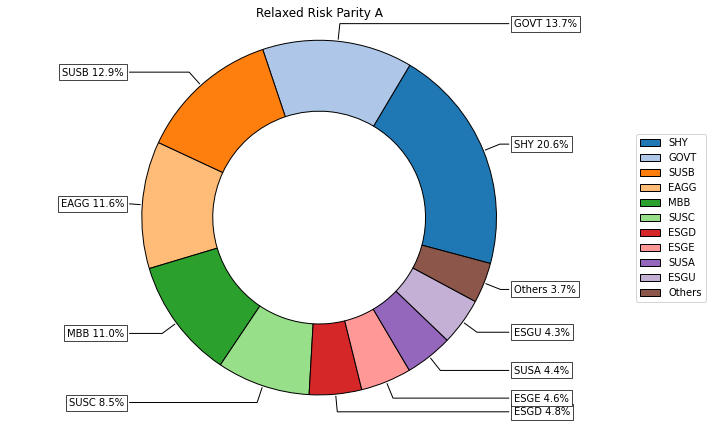

In [38]:
version = 'A' # Could be A, B or C

w_rrp_a = port.rrp_optimization(model=model, version=version, l=l, b= None, hist=hist)

display(w_rrp_a.T)
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w_rrp_a, title='Relaxed Risk Parity A', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [39]:
from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting

S = risk_models.CovarianceShrinkage(etf_prices).ledoit_wolf()
market_prior = w_rrp_a

viewdict = {
    "ESGU": 0.10,
    "EAGG": 0.30,
    "ESGE": 0.05,
    "ESML": 0.05,
    "SUSB": 0.20,
    "ESGD": -0.05,  # Negative view on ESGD
    "SHY": 0.15,
    "SUSA": 0.10,
    "GOVT": 0.50,  # Low confidence in the positive view on GOVT
    "MBB": 0.10,
    "SUSC": 0.10
}

confidences = [
    0.6,
    0.4,
    0.2,
    0.5,
    0.7, # confident in dominos
    0.7, # confident KO will do poorly
    0.7, 
    0.5,
    0.1,
    0.4,
    0.1
]


In [40]:
bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict, omega="idzorek", view_confidences=confidences)

# Posterior estimate of returns
ret_bl = bl.bl_returns()
ret_bl


EAGG    0.172992
ESGD    0.027131
ESGE    0.037734
ESGU    0.051599
ESML    0.041422
GOVT    0.182109
MBB     0.133941
SHY     0.175248
SUSA    0.051106
SUSB    0.178591
SUSC    0.171944
dtype: float64

In [41]:
import pandas as pd
import numpy as np

# Assuming market_prior is a DataFrame and ret_bl is a Series
market_prior_values = market_prior.values.flatten()
ret_bl_values = ret_bl.values.flatten()


# Create the DataFrame
rets_df = pd.DataFrame({
    "Prior": market_prior_values,
    "Posterior": ret_bl_values,
    "Views": pd.Series(viewdict)
})

# Display the DataFrame
print(rets_df)


         Prior  Posterior  Views
ESGU  0.115827   0.172992   0.10
EAGG  0.047693   0.027131   0.30
ESGE  0.046257   0.037734   0.05
ESML  0.043095   0.051599   0.05
SUSB  0.036776   0.041422   0.20
ESGD  0.136961   0.182109  -0.05
SHY   0.109588   0.133941   0.15
SUSA  0.206251   0.175248   0.10
GOVT  0.043535   0.051106   0.50
MBB   0.129034   0.178591   0.10
SUSC  0.084984   0.171944   0.10


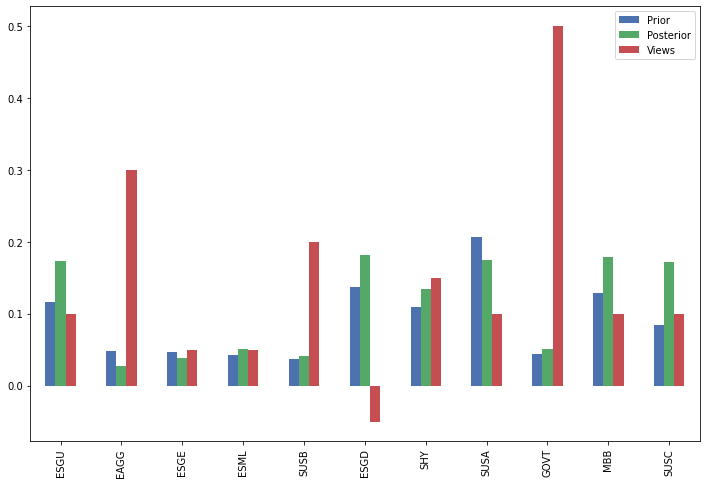

In [42]:
rets_df.plot.bar(figsize=(12,8));